# Final Project - Analyzing Sales Data

**Date**: 22 August 2024

**Author**: `Terra Keeratinavanant`

**Course**: Data Science Bootcamp by DataRockie

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Data Exploration

In [2]:
# import data
df = pd.read_csv("sample-store.csv")

# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:

df.shape

(9994, 21)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

## Data Preparation

In [5]:
# convert columns 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df[['Order Date', 'Ship Date']]

,Order Date,Ship Date
0,2019-11-08,2019-11-11
1,2019-11-08,2019-11-11
2,2019-06-12,2019-06-16
3,2018-10-11,2018-10-18
4,2018-10-11,2018-10-18
...,...,...
9989,2017-01-21,2017-01-23
9990,2020-02-26,2020-03-03
9991,2020-02-26,2020-03-03
9992,2020-02-26,2020-03-03


In [6]:
# check missing values
df.isna().sum().sort_values(ascending=False)

Postal Code       11
Order ID           0
Order Date         0
Ship Date          0
Row ID             0
Ship Mode          0
Customer ID        0
Segment            0
Customer Name      0
Country/Region     0
City               0
State              0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [7]:
# Find the relationship between Postal Code and City (which is the smallest unit closest to Postal Code)
# to see if we can impute missing values with specificic cities
one_to_one_or_many_to_one = df.groupby('Postal Code')['City'].nunique().max() == 1
one_to_many = df.groupby('City')['Postal Code'].nunique().max() == 1

if one_to_one_or_many_to_one and one_to_many:
    print("one-to-one")
elif one_to_one_or_many_to_one and one_to_many == False:
    print("many_to_one")
elif one_to_one_or_many_to_one == False and one_to_many:
    print("one_to_many")
else:
    print("many-to-many")

many-to-many


In [8]:
# Drop missing values and check
df.dropna(axis=1)
df.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

## Data Analysis

1. Your friend ask for all `California` data in csv format

In [9]:
# use os.path.exists to prevent overwriting

file_path = 'california_data_just_for_you.csv'

if not os.path.exists(file_path):
    df.loc[df['State'] == 'California', :].to_csv(file_path, index=False)
    print(f"File saved as {file_path}")
else:
    print(f"File {file_path} already exists, not overwriting.")

File saved as california_data_just_for_you.csv


2. Your friend ask for count of order ID per category and subcategory in `California` and `Texas` in 2017

In [10]:
specified_category = df.loc[(df['State'].isin(['California','Texas'])) & (df['Order Date'].dt.year == 2017), ['Category', 'Sub-Category', 'Order ID']]

# pivot table version
pivot = specified_category.pivot_table(index = ['Category', 'Sub-Category'], values = 'Order ID', aggfunc='count', margins=True)

# groupby version
cat_count = specified_category.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

print(pivot)
print(cat_count)

                              Order ID
Category        Sub-Category          
Furniture       Bookcases           16
                Chairs              48
                Furnishings         58
                Tables              24
Office Supplies Appliances          25
                Art                 53
                Binders             79
                Envelopes           18
                Fasteners           18
                Labels              25
                Paper               87
                Storage             49
                Supplies            16
Technology      Accessories         46
                Copiers              2
                Machines            11
                Phones              57
All                                632
           Category Sub-Category  Count
0         Furniture    Bookcases     16
1         Furniture       Chairs     48
2         Furniture  Furnishings     58
3         Furniture       Tables     24
4   Office Supplies 

3. How much total sales, average sales, and standard deviation of sales your company make in 2017

In [11]:
sales_in_2017 = df.loc[df['Order Date'].dt.year == 2017, 'Sales'].to_frame()

# create new dataframe for sales aggregrate
agg_sales_in_2017 = pd.DataFrame([
    {'total_sales': [0],
     'average_sales': [0],
     'std_sales': [0]}
])
agg_sales_in_2017['total_sales'] = sales_in_2017['Sales'].sum()
agg_sales_in_2017['average_sales'] = sales_in_2017['Sales'].mean()
agg_sales_in_2017['std_sales'] = sales_in_2017['Sales'].std()
agg_sales_in_2017

,total_sales,average_sales,std_sales
0,484247.4981,242.974159,754.053357


4. Which Segment has the highest profit in 2018

In [12]:
seg_pro_2018 = df.loc[df['Order Date'].dt.year == 2018, ['Segment', 'Profit']]
seg_pro_2018 = seg_pro_2018.groupby('Segment', as_index = False)['Profit'].sum()
seg_pro_2018.loc[seg_pro_2018['Profit'] == seg_pro_2018['Profit'].max(), :]

,Segment,Profit
0,Consumer,28460.1665


5. Which top 5 States have the least total sales between 15 April 2019 - 31 December 2019

In [13]:
sales_state_on_date = df.loc[(df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31'), ['State', 'Sales']]
sales_state_on_date.groupby('State', as_index = False)['Sales'].sum().sort_values('Sales').head(5)

,State,Sales
26,New Hampshire,49.05
28,New Mexico,64.08
7,District of Columbia,117.07
16,Louisiana,249.80
36,South Carolina,502.48


6. What is the proportion of total sales (%) in West + Central in 2019 e.g. 25% 

In [14]:
region_sales = df.loc[(df['Order Date'].dt.year == 2019), ['Region', 'Sales']]
region_sales = region_sales.groupby('Region', as_index = False)['Sales'].sum()
region_sales['Proportion'] = region_sales['Sales']/region_sales['Sales'].sum() * 100
region_sales.round(2)

,Region,Sales,Proportion
0,Central,147429.38,24.20
1,East,180685.82,29.66
2,South,93610.22,15.37
3,West,187480.18,30.77


7. Find top 10 popular products in terms of number of orders vs. total sales during 2019-2020

In [15]:
order_vs_sales = df[['Product Name', 'Sales']]
order_vs_sales = order_vs_sales.groupby('Product Name', as_index = False)['Sales'].agg(['count', 'sum'])
order_vs_sales['proportion'] = order_vs_sales['count'] / order_vs_sales['sum'] * 100
order_vs_sales.columns = ['Product Name', 'Number of Orders', 'Total Sales', 'Proportion']
order_vs_sales.round().sort_values('Proportion', ascending = False).head(10)

,Product Name,Number of Orders,Total Sales,Proportion
604,Eureka Disposable Bags for Sanitaire Vibra Gro...,1,2.0,62.0
1050,Maxell 4.7GB DVD+R 5/Pack,5,12.0,43.0
866,Hoover Replacement Belt for Commercial Guardsm...,4,10.0,41.0
462,Computer Printout Index Tabs,4,11.0,36.0
59,Acco Economy Flexible Poly Round Ring Binder,4,11.0,35.0
1194,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",5,16.0,32.0
923,Insertable Tab Indexes For Data Binders,5,17.0,29.0
1512,Storex Flexible Poly Binders with Double Pockets,3,11.0,28.0
266,Avery Reinforcements for Hole-Punch Pages,8,29.0,28.0
249,Avery Hi-Liter Comfort Grip Fluorescent Highli...,2,8.0,26.0


## Data Visualization

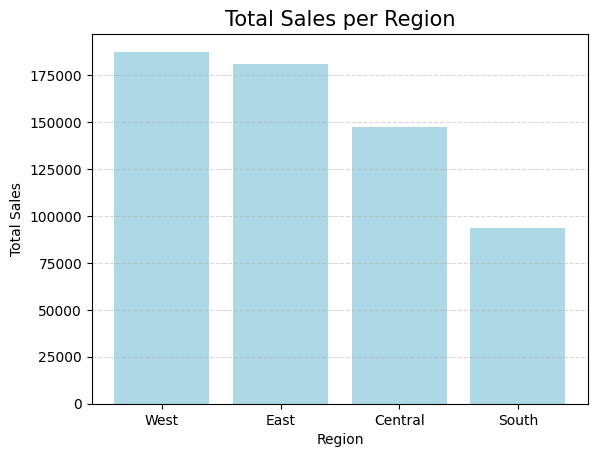

In [16]:
# Plot Total Sales per Region

# sort the data
region_sales.sort_values('Sales', ascending = False, inplace = True)

# use bar chart
plt.bar(region_sales['Region'], region_sales['Sales'], color='lightblue')
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region', fontsize=15)
plt.show()

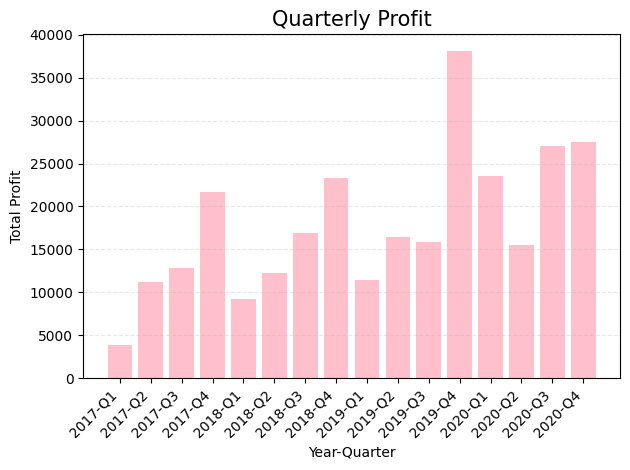

In [17]:
# Plot Total Profit per Quarter

# create the 'Quarter' and 'Year' columns
profit_quarter = df.loc[:, ['Profit', 'Order Date']]
profit_quarter['Quarter'] = profit_quarter['Order Date'].dt.quarter
profit_quarter['Year'] = profit_quarter['Order Date'].dt.year

# drop 'Order Date' column to exclude it from the groupby result
profit_quarter = profit_quarter.drop(columns=['Order Date'])

# group by 'Year' and 'Quarter', summing the profit for each quarter
profit_quarter = profit_quarter.groupby(['Year', 'Quarter'], as_index = False)['Profit'].sum().sort_values(['Year','Quarter'])

# create Year-Quarter labels by concatenating 'Year' and 'Quarter' columns
profit_quarter['Year-Quarter'] = profit_quarter['Year'].astype(str) + '-Q' + profit_quarter['Quarter'].astype(str)

# use bar chart
plt.bar(profit_quarter['Year-Quarter'], profit_quarter['Profit'], color = 'pink')
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Profit')
plt.title('Quarterly Profit', fontsize = 15)
plt.tight_layout()
plt.show()